Considering a dataset with images of cats and dogs, we build a convolutional neural network and add a classifier on top of it, to recognize the image given as either a cat or a dog.

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_img_path= '/content/drive/MyDrive/datasetCD'
train_generator = train_datagen.flow_from_directory(train_img_path, target_size =(150, 150),
                                                      batch_size = 20, class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(train_img_path, target_size =(150, 150),
                                                      batch_size = 20, class_mode = "binary")

Found 360 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


In [5]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ="sigmoid"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [6]:
from keras import optimizers

model.compile(loss ="binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate = 1e-4),
metrics =['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 5,
validation_data = validation_generator, validation_steps = 50)


Epoch 1/5


<ipython-input-6-47430d329bcd>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 5,


 18/100 [====>.........................] - ETA: 6s - loss: 0.7009 - accuracy: 0.4972

100/100 [==============================] - 5s 41ms/step - loss: 0.7009 - accuracy: 0.4972 - val_loss: 0.6879 - val_accuracy: 0.5778


(1, 150, 150, 3)


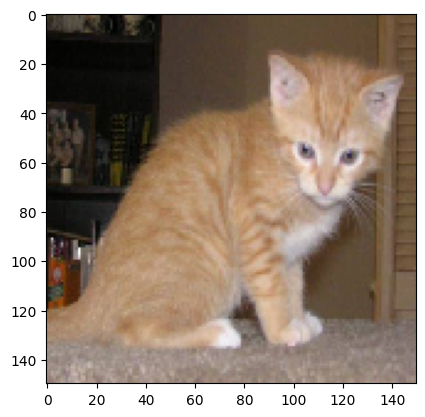

In [7]:
from keras.preprocessing import image
import numpy as np
image_path='/content/drive/MyDrive/datasetCD/cat/cat.4003.jpg'
# Pre-processing the image
img = image.load_img(image_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

# Print image tensor shape
print(img_tensor.shape)

# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()


1/1 [==============================] - 0s 374ms/step
(1, 148, 148, 32)


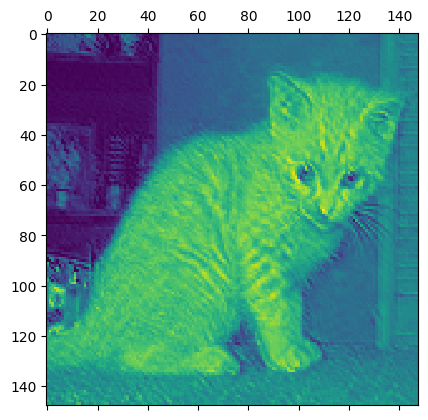

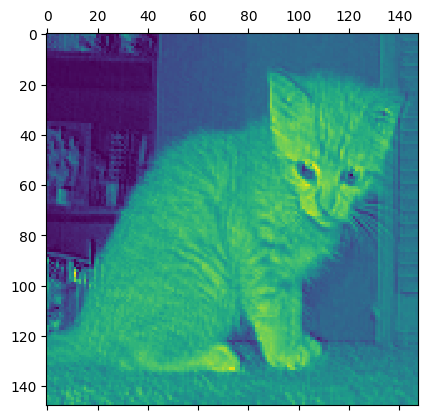

In [8]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Getting Activations of first layer
first_layer_activation = activations[0]

# shape of first layer activation
print(first_layer_activation.shape)

# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')

# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')


In [12]:
layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)


['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7']
